## ALS implementation using Spark for Movie Recommendation

Install Basic Libraries

Import basic spark libraries

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("als").getOrCreate()

### Load Movie Ratings Data

In [ ]:
ratings = spark.read.csv("s3a://sparkdemonstration-mlc/ratings.csv",inferSchema=True, header=True)

## Visualize ratings data in Rating Matrix format

In [ ]:
rating_small = spark.read.csv("s3a://sparkdemonstration-mlc/ratings_small.csv",inferSchema=True, header=True)

### Load Movies Data

In [ ]:
movies = spark.read.csv("s3a://sparkdemonstration-mlc/movies.csv",inferSchema=True, header=True)

### Split the Rating data to Train & Test set

In [ ]:
(training, test) = ratings.randomSplit([0.6, 0.4], seed=99)

In [ ]:
training.count(), test.count(), ratings.count()

## ALS Model

Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics

Model Training

## Calculate the RMSE error

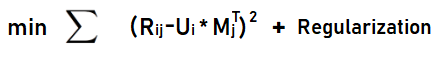

Evaluate the model by computing the RMSE on the test data

## How to Choose optimal maxIter value

While training the model we've used maxIter value as 5<br>which means there will be 5 iterations of the complete model to get the least error.<br>
Its possible that we can get most optimal model is less than 5 or more then 5 iterations.<br>
You have seen in the video that the iteration **value = 3** is optimal value to train the model.


We can not run the python commands here when we set the kernel as PySpark to plot the graph between number of iterations and RMSE values.

## Now train Model with most optimal maxIter value

## Generate top 10 User Recommendation for a Movie

Join with the Movies data

## Generate top 10 Recommended Movies for all the Users

## Get top 20 Movies Prediction